In [1]:
import h5py
import numpy as np
import PIL.Image as Image
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint



In [2]:
import numpy as np
import PIL.Image as Image
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

def load_h5_to_dictionary(file_path):
    data_dict = {}
    with h5py.File(file_path, 'r') as hf:
        for key in hf.keys():
            # Create a list to store the arrays for each key
            array_list = []
            # Get the group corresponding to the current key
            group = hf[key]
            for dataset_name in group.keys():
                # Append each dataset (array) to the array list
                array_list.append(np.array(group[dataset_name]))
            # Store the array list for the current key in the dictionary
            data_dict[key] = array_list
    return data_dict

In [24]:
file_path = 'content/datasets/h5_out/raw_image_sim.h5'
loaded_dictionary_images_sim=load_h5_to_dictionary(file_path)

file_path = 'content/datasets/h5_out_perturbed/raw_image_sim.h5'
loaded_dictionary_images_sim_perturbed=load_h5_to_dictionary(file_path)

file_path = 'content/datasets/h5_out/segmentation_masks_list_sim.h5'
loaded_segmentation_masks_sim=load_h5_to_dictionary(file_path)

file_path = 'content/datasets/h5_out/semantic_id_list_sim.h5'
loaded_semantic_id_sim=load_h5_to_dictionary(file_path)

file_path = 'content/datasets/h5_out_perturbed/semantic_id_list_sim.h5'
loaded_semantic_id_sim_perturbed=load_h5_to_dictionary(file_path)

In [ ]:
# Define the desired semantic ID you want to display
desired_semantic_id = 0
def find_lowest_dimensions(images_list1, images_list2):
    # Find the lowest height and width across both lists
    lowest_height=10000
    lowest_width=10000
    
    for i in range(0,len(images_list1)):
        print(images_list1[i].shape)
        height = min(images_list1[i].shape[0], images_list2[i].shape[0])
        width = min(images_list1[i].shape[1], images_list2[i].shape[1])
        lowest_height=min(height,lowest_height)
        lowest_width=min(width,lowest_width)
    return lowest_height, lowest_width

def crop_images_to_lowest_dimensions(images_list, lowest_height, lowest_width):
    cropped_images = [image[:lowest_height, :lowest_width,:] for image in images_list]
    return cropped_images

def crop_1d_to_lowest_dimensions(images_list, lowest_height, lowest_width):
    cropped_images = [image[:lowest_height, :lowest_width] for image in images_list]
    return cropped_images


dataset_index_list=["0001","0002","0006","0018","0020"]
perturbed_dataset_index_list=list(loaded_dictionary_images_sim_perturbed.keys())


lowest_height=10000
lowest_width=10000

for dataset_index in dataset_index_list:
  height, width = find_lowest_dimensions(loaded_dictionary_images_sim[dataset_index], loaded_semantic_id_sim[dataset_index])
  lowest_height=min(height,lowest_height)
  lowest_width=min(width,lowest_width)
for dataset_index in perturbed_dataset_index_list:
  height, width = find_lowest_dimensions(loaded_dictionary_images_sim_perturbed[dataset_index], loaded_semantic_id_sim_perturbed[dataset_index])
  lowest_height=min(height,lowest_height)
  lowest_width=min(width,lowest_width)




for dataset_index in dataset_index_list:

    
    loaded_dictionary_images_sim[dataset_index] = crop_images_to_lowest_dimensions(loaded_dictionary_images_sim[dataset_index], lowest_height, lowest_width)
    loaded_semantic_id_sim[dataset_index] = crop_1d_to_lowest_dimensions(loaded_semantic_id_sim[dataset_index], lowest_height, lowest_width)
    loaded_segmentation_masks_sim[dataset_index] = crop_images_to_lowest_dimensions(loaded_segmentation_masks_sim[dataset_index], lowest_height, lowest_width)

for dataset_index in perturbed_dataset_index_list:
    loaded_semantic_id_sim_perturbed[dataset_index] = crop_1d_to_lowest_dimensions(loaded_semantic_id_sim_perturbed[dataset_index], lowest_height, lowest_width)
    loaded_dictionary_images_sim_perturbed[dataset_index] = crop_images_to_lowest_dimensions(loaded_dictionary_images_sim_perturbed[dataset_index], lowest_height, lowest_width)

In [26]:
# Define the desired semantic ID you want to display
desired_semantic_id = 0
def map_to_r(number):
    colorr = [255, 128, 0, 0, 128, 0, 0, 0, 128, 0, 0, 0, 128, 0, 128, 255, 128, 255, 0, 128]
    if number < 20:
        return int(colorr[number])
    else:
        return 0

def map_to_g(number):
    colorg = [0, 128, 255, 128, 0, 0, 128, 0, 0, 128, 0, 128, 0, 128, 255, 128, 0, 128, 255, 128]
    if number < 20:
        return int(colorg[number])
    else:
        return 0

def map_to_b(number):
    colorb = [0, 0, 0, 128, 128, 255, 255, 128, 0, 128, 128, 255, 128, 0, 0, 0, 128, 255, 255, 128]
    if number < 20:
        return int(colorb[number])
    else:
        return 255
    
dataset_index_list_train=["0001","0002","0006"]
dataset_index_list_test=["0020"]


In [ ]:

test_indexes_sim = {}
indexes_real = {}
train_indexes_sim_perturbed = {}
valid_indexes_sim_perturbed = {}
pattern = 'tttttttttv'
pattern_pointer = 0


for dataset_index in dataset_index_list_test:
  test_dataset_inner = []
  for index in range(1, len(loaded_dictionary_images_sim[dataset_index])):
    test_dataset_inner.append(index)
  test_indexes_sim[dataset_index]=test_dataset_inner

for dataset_index in perturbed_dataset_index_list:
  pert_dataset_inner_train = []
  pert_dataset_inner_valid = []
  for index in range(1, len(loaded_dictionary_images_sim_perturbed[dataset_index])):
    pattern_char = pattern[pattern_pointer]
    if pattern_char == 't':
        pert_dataset_inner_train.append(index)
    else:
        pert_dataset_inner_valid.append(index)
    pattern_pointer = (pattern_pointer + 1) % len(pattern)
  train_indexes_sim_perturbed[dataset_index]=pert_dataset_inner_train
  valid_indexes_sim_perturbed[dataset_index]=pert_dataset_inner_valid





In [ ]:
print("Segmentation test sim") 
for dataset_index in dataset_index_list_test:
    print("Dataset", dataset_index)
    print("Test sim: ",len(test_indexes_sim[dataset_index]))
for dataset_index in perturbed_dataset_index_list:
    print("Dataset", dataset_index)
    print("Train sim perturbed: ",len(train_indexes_sim_perturbed[dataset_index]))
    print("Valid sim perturbed: ",len(valid_indexes_sim_perturbed[dataset_index]))
print("Segmentation test real") 

In [29]:
import tensorflow as tf
import numpy as np

def map_to_desired_structure(input_image, output_image):
    return {'pixel_values': input_image, 'labels': output_image}

def map_values(value):
    # if value in [1, 2, 6, 7, 8, 16, 21, 255]:
    #     return 1
    # elif value in [11, 12]:
    #     return 2
    # elif value in [13, 14, 15, 17]:
    #     return 3
    # elif value == 10:
    #     return 4
    # elif value == 0:
    #     return 0
    # else:
    #     return 1
    # if value==255:
    #     value= 22
    return value

def generator(input_dict, output_dict, input_indices, input_dic_keys):
    vectorized_map = np.vectorize(map_values)
    for key in input_dic_keys:
        for index in input_indices[key]:
            if index < len(input_dict[key]):
                input_image = input_dict[key][index]
                output_image = output_dict[key][index]
                
                # Apply transformations lazily
                input_image = tf.reverse(input_image, axis=[-1])
                input_image = tf.transpose(input_image, (2, 0, 1))  # Adjust to (channels, height, width)
                
                # Vectorize and map values for the label
                output_image = vectorized_map(output_image)

                # Yield one image and label pair at a time
                yield input_image, output_image

def create_tf_dataset(input_dict, output_dict, input_indices, input_dic_keys, batch_size=5):
    # Use a generator to load the data lazily
    dataset = tf.data.Dataset.from_generator(
        lambda: generator(input_dict, output_dict, input_indices, input_dic_keys),
        output_signature=(
            tf.TensorSpec(shape=(None, None, None), dtype=tf.float32),  # Input image shape
            tf.TensorSpec(shape=(None, None), dtype=tf.float32)          # Output image shape
        )
    )

    # Preprocess dataset by mapping to the desired structure
    dataset = dataset.map(map_to_desired_structure)

    # Shuffle and batch the dataset
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)  # Load batches asynchronously

    return dataset

In [30]:
tf_dataset_test_sim = create_tf_dataset(loaded_dictionary_images_sim, loaded_semantic_id_sim, test_indexes_sim,dataset_index_list_test)
tf_dataset_train_perturbation_sim = create_tf_dataset(loaded_dictionary_images_sim_perturbed, loaded_semantic_id_sim_perturbed, train_indexes_sim_perturbed,perturbed_dataset_index_list)
tf_dataset_valid_perturbation_sim = create_tf_dataset(loaded_dictionary_images_sim_perturbed, loaded_semantic_id_sim_perturbed, valid_indexes_sim_perturbed,perturbed_dataset_index_list)


In [31]:
test_dataset =tf_dataset_test_sim
pert_train_dataset=tf_dataset_train_perturbation_sim
pert_valid_dataset=tf_dataset_valid_perturbation_sim


In [32]:
auto = tf.data.AUTOTUNE


test_ds = (
    test_dataset
    .prefetch(auto)
)

pert_train_ds = (
    pert_train_dataset
    .prefetch(auto)
)

pert_valid_ds = (
    pert_valid_dataset
    .prefetch(auto)
)

In [33]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ["Input Image", "True Mask", "Predicted Mask","diff"]

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i + 1)
        plt.title(title[i])
        # print(display_list[i].shape)
        img=tf.keras.utils.array_to_img(display_list[i])
        img_raw=display_list[i].numpy().astype(int)[:,:,0]
        if i>0:
            print(np.unique(img_raw))
            colored_mask = np.zeros_like(tf.keras.utils.array_to_img(display_list[0]))
            colored_mask[:, :, 0] = np.vectorize(map_to_b)(img_raw)
            colored_mask[:, :, 1] = np.vectorize(map_to_g)(img_raw)
            colored_mask[:, :, 2] = np.vectorize(map_to_r)(img_raw)
            img=colored_mask
        plt.imshow(img)
        plt.axis("off")
    plt.show()

sim test
[ 0  1  2  7  8 10 13 21]


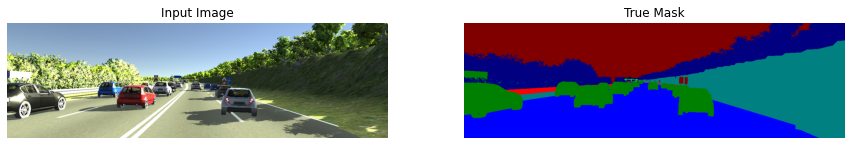

[ 0  1  2  7  8 10 13 21]


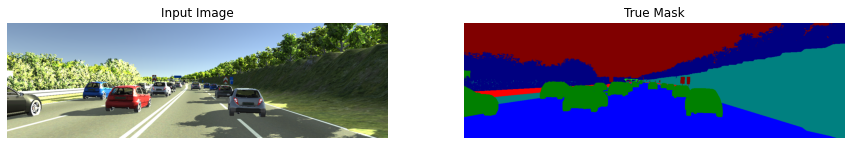

[ 0  1  2  7  8 10 13 21]


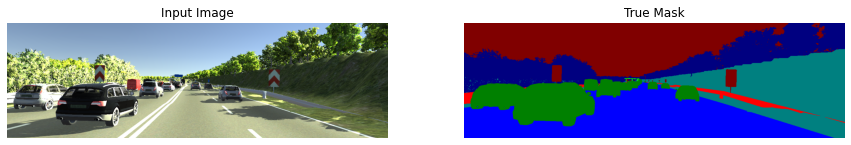

[ 0  1  2  7  8 10 13 21]


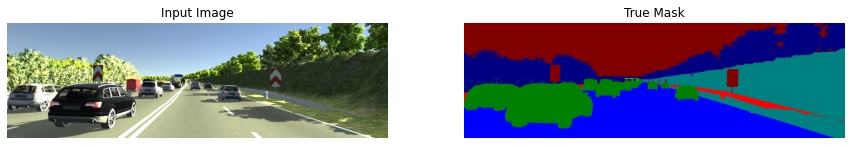

[ 0  1  2  7  8 10 13 21]


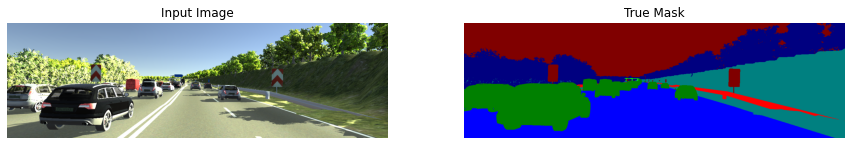

In [34]:
print("sim test")
for samples in test_ds.take(1):
    for i in range(0,5):
        sample_image, sample_mask = samples["pixel_values"][i], samples["labels"][i]
        sample_image = tf.transpose(sample_image, (1, 2, 0))
        
        sample_mask = tf.expand_dims(sample_mask, -1)
        display([sample_image, sample_mask])

In [ ]:
print("perturbed train")
print(pert_train_ds)
for samples in pert_train_ds.take(1):
    for i in range(0,5):
        sample_image, sample_mask = samples["pixel_values"][i], samples["labels"][i]
        sample_image = tf.transpose(sample_image, (1, 2, 0))
        
        sample_mask = tf.expand_dims(sample_mask, -1)
        display([sample_image, sample_mask])

perturbed test
[ 0  1  2  7  8 10 13]


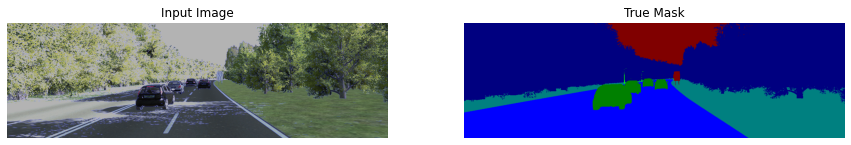

[ 0  1  2  7  8 10 13]


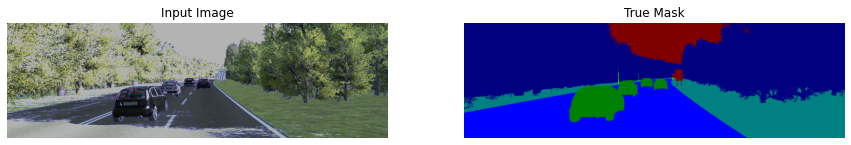

[ 0  1  2  7  8 10 13]


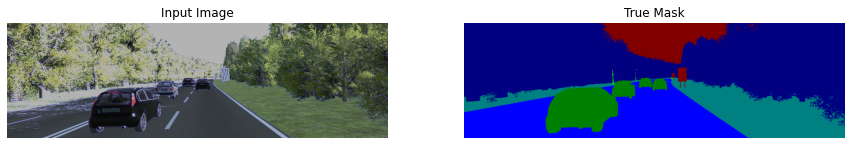

[ 0  1  2  7  8 10 13]


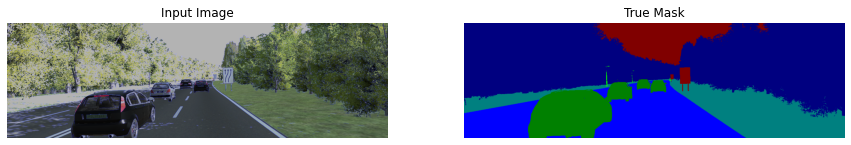

[ 0  1  2  7  8 10 13]


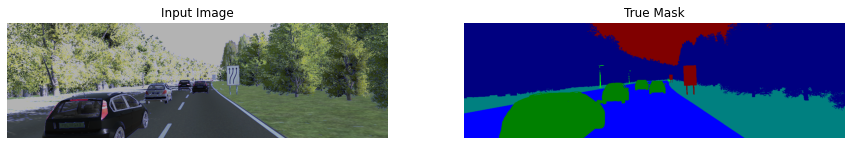

In [36]:
print("perturbed test")
for samples in pert_valid_ds.take(1):
    for i in range(0,5):
        sample_image, sample_mask = samples["pixel_values"][i], samples["labels"][i]
        sample_image = tf.transpose(sample_image, (1, 2, 0))
        
        sample_mask = tf.expand_dims(sample_mask, -1)
        display([sample_image, sample_mask])

In [38]:
from transformers import  TFSegformerForSemanticSegmentation,SegformerFeatureExtractor
from PIL import Image
import requests

model_checkpoint = "nvidia/segformer-b0-finetuned-cityscapes-640-1280"

# id2label mapping for the KITTI dataset
label2id = {
        'Road': 0,
        'Sidewalk': 1,
        'Building': 2,
        'Wall': 3,
        'Fence': 4,
        'Pole': 5,
        'TrafficLight': 6,
        'TrafficSign': 7,
        'Vegetation': 8,
        'Terrain': 9,
        'Sky': 10,
        'Person': 11,
        'Rider': 12,
        'Car': 13,
        'Truck': 14,
        'Bus': 15,
        'Train': 16,
        'Motorcycle': 17,
        'Bicycle': 18,
        'Void': 255,
        'Misc': 19,
        'GuardRail': 20,
    }
id2label = {label: id for id, label in label2id.items()}
num_labels = len(id2label)
print(len(id2label))
model = TFSegformerForSemanticSegmentation.from_pretrained(
    model_checkpoint,
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True,
)




22


All model checkpoint layers were used when initializing TFSegformerForSemanticSegmentation.

Some weights of TFSegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/segformer-b0-finetuned-cityscapes-640-1280 and are newly initialized because the shapes did not match:
- decode_head/classifier/kernel:0: found shape (1, 1, 256, 19) in the checkpoint and (1, 1, 256, 22) in the model instantiated
- decode_head/classifier/bias:0: found shape (19,) in the checkpoint and (22,) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
from IPython.display import clear_output


def create_mask(pred_mask):
    pred_mask = tf.math.argmax(pred_mask, axis=1)
    pred_mask = tf.expand_dims(pred_mask, -1)
    return pred_mask[0]
    
def cast_to_int32(image):
    # Normalize the image pixel values to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    # Convert to uint8 by scaling the values back to [0, 255]
    image = tf.cast(image * 255, tf.int32)
    return image
    
def show_predictions(dataset,lowest_height,lowest_width, num=1):
    for sample in dataset.take(num): 
        images, masks = sample["pixel_values"], sample["labels"]
        
        masks = tf.expand_dims(masks, -1)
        pred_masks = model.predict(images).logits
        images = tf.transpose(images, (0, 2, 3, 1))
        created_mask=cast_to_int32(create_mask(pred_masks))
        gt=cast_to_int32(masks[0])
        created_mask = tf.image.resize(created_mask, [lowest_height, lowest_width],
                        method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
        diff_mask_road=abs(created_mask-gt)
        display([images[0], gt,created_mask,diff_mask_road ])


class DisplayCallback(tf.keras.callbacks.Callback):
    def __init__(self, dataset,lowest_height,lowest_width, **kwargs):
        super().__init__(**kwargs)
        self.dataset = dataset
        self.lowest_height=lowest_height
        self.lowest_width=lowest_width

    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        show_predictions(self.dataset,self.lowest_height,self.lowest_width)
        print("\nSample Prediction after epoch {}\n".format(epoch + 1))

In [40]:
lr = 0.00006
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer=optimizer)

In [41]:
checkpoint_file_path = "./content/Model_original.hdf5"
model.load_weights(checkpoint_file_path)

2024-09-19 09:20:28.965950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[ 0  1  2  7  8 10 13]
[ 0  1  7  8 10 13]
[ 0  1  2  5  6  7 11 12 13]


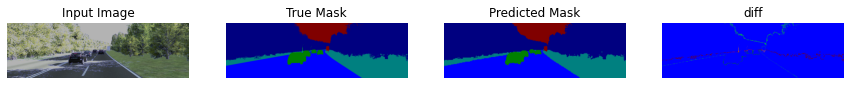


Sample Prediction after epoch 1


Epoch 1: val_loss improved from inf to 0.06178, saving model to ./content/Model_original_perturbed.hdf5
1400/1400 [==============================] - 1720s 1s/step - loss: 0.0688 - val_loss: 0.0618


In [42]:
CheckpointCallback = ModelCheckpoint("./content/Model_original_perturbed.hdf5", verbose=1, monitor='val_loss', save_best_only=True,save_weights_only=True)
epochs = 1
history = model.fit(
    pert_train_ds,
    validation_data=pert_valid_ds,
    callbacks=[DisplayCallback(pert_valid_ds,lowest_height,lowest_width), CheckpointCallback],
    epochs=epochs,
)
    

In [43]:
checkpoint_file_path = "./content/Model_original_perturbed.hdf5"
model.save_weights(checkpoint_file_path)

In [44]:
model.load_weights(checkpoint_file_path)

In [ ]:
# show_predictions(test_ds,1)
show_predictions(pert_valid_ds,lowest_height,lowest_width,10)